# Hotel Review Sentiment Analysis Part 2: EDA
## Adura ABIONA, PhD (UNSW)
### 4 May, 2017

## Introduction

#### This is the **Part 2** of the **Hotel Review Sentiment Analysis** of Australian hotels, from four major cities (Canberra, Sydney, Melbourne and Brisbane), based on reviewers' opionions (on a numerical scale of 1-5) from [**TripAdvisor**](http://www.tripadvisor.com.au) website. This part is focused on **Exploratory Data Analysis (EDA)** of the reviews. 

Inspired by a fascinating EDA done by Kevin Hung and Henry Qiu on [**Yelp Dataset Challenge 2014**](https://kevin11h.github.io/YelpDatasetChallengeDataScienceAndMachineLearningUCSD/)

In [1]:
import glob, os, string # os.chdir()
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
matplotlib.style.use('ggplot')
%matplotlib inline 
sep = "~"
DataDir = "Datasets/" 
#nltk.download() # download the english stopwords corpus and the punkt package and maybe the porter stemmer if not present
print(pd.__version__)

0.20.1


#### The block of code below reads the review details for the hotels from the 4 major cities in Australia into a dataframe.

In [2]:
review_feats = ['id', 'title','body','rati','value','locat','sleep','rooms','clean','servi','other']
citys = ['Canberra', 'Sydney', 'Melbourne', 'Brisbane']
review_df = pd.DataFrame() #creates a new dataframe that's empty
for city in citys:
    citydir = os.path.join(os.getcwd(), DataDir + city)
    for file in glob.glob(os.path.join(citydir,"*-review.mcsv")): 
        review_df = review_df.append(pd.read_csv(os.path.join(citydir, file), sep=sep, header=None, names = review_feats), ignore_index=True)

print(review_df.shape)
review_df.head()

(27868, 11)


,id,title,body,rati,value,locat,sleep,rooms,clean,servi,other
0,review_478470647,“Waste of money”,"From the moment we walked into the Adobe,we kn...",1,1,NaN,NaN,2.0,NaN,1.0,NaN
1,review_476951438,“Well appointed room”,On check in was a queue of 6 waiting with only...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,review_476646112,"“Forgotten property ""vanished into thin air"" a...",Review submitted on behalf of my wife who was ...,2,4,NaN,NaN,4.0,NaN,2.0,NaN
3,review_475716850,“Everything you need and more”,This is a great hotel. Clean and really comfor...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,review_474490948,"“Super handy for shops, food and transport”",This is my go to accommodation in Canberra. Cl...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
review_dfx = review_df[['id', 'title', 'body', 'rati']].copy()
review_dfx['rati'] = pd.to_numeric(review_dfx['rati'], errors='coerce') 
review_dfx = review_dfx.dropna(axis=0)
print(review_dfx.rati.unique())
print(review_dfx.shape)
review_dfx.head()

[ 1.  3.  2.  5.  4.]
(27408, 4)


,id,title,body,rati
0,review_478470647,“Waste of money”,"From the moment we walked into the Adobe,we kn...",1.0
1,review_476951438,“Well appointed room”,On check in was a queue of 6 waiting with only...,3.0
2,review_476646112,"“Forgotten property ""vanished into thin air"" a...",Review submitted on behalf of my wife who was ...,2.0
3,review_475716850,“Everything you need and more”,This is a great hotel. Clean and really comfor...,5.0
4,review_474490948,"“Super handy for shops, food and transport”",This is my go to accommodation in Canberra. Cl...,5.0


### Rating Category Distribution for Reviews
The rating categories (1,2,3,4, and 5) are from now on color coded with red, orange, blue, purple and green respectively.

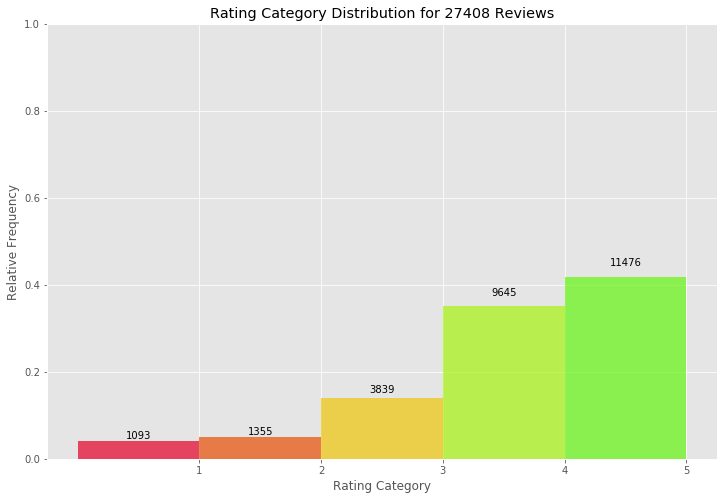

In [4]:
rat_cat = 5
colors = np.array(['#E50029', '#E94E04', '#EEC708', '#A5F30D', '#62F610']) # 1, 2, 3, 4, and 5 ratings respectively

rat_labels = np.array([x_rat+1 for x_rat in range(rat_cat)])
rat_cat_dist_fig = plt.figure(figsize=(12,8))
bar_plot_indices = np.arange(rat_cat)
rat_cat_absolute_freq = review_dfx.rati.value_counts(ascending=True)
rat_cat_relative_freq = np.array(rat_cat_absolute_freq)/float(sum(rat_cat_absolute_freq))

rects = plt.bar(bar_plot_indices, rat_cat_relative_freq, width=1, color=colors, alpha=.7)
for (idx, rect) in enumerate(rects):
        plt.gca().text(rect.get_x()+rect.get_width()/2., 1.05*rect.get_height(), '%d'%int(rat_cat_absolute_freq[idx+1]), ha='center', va='bottom')

plt.xticks(bar_plot_indices+.5, rat_labels)
plt.xlabel('Rating Category')
plt.ylabel('Relative Frequency')
plt.ylim([0,1])
plt.title('Rating Category Distribution for {0} Reviews'.format(len(review_dfx)))

plt.show()

Not a conclusive observation, but do overwhelmingly amount of users in our subset sample write Yelp reviews to share positive experiences more than they do negative ones?

## Wordcloud of 1 to 5 rating reviews
#### We will interface Python with R in order to make the wordclouds. Python to format the ngram count data, and R to visualize the data, respectively.  The R [**notebook**](http://localhost:8889/notebooks/GitHub/DaSc/Hotel-Reviews/Hotel-Reviews_R_Wordcloud.ipynb) (Hotel-Reviews_R_Wordcloud.ipynb) for this can be found in the main directory of this project.  


In [5]:
#Some words (e.g. no, not, more, most etc.) have been removed from the standard stopwords available in NLTK. 
#It’s done so because those words can have some sentiment impact in our review dataset.
#nltk.download() # download the english stopwords corpus and the punkt package and maybe the porter stemmer if not present

custom_stopwords = set(stopwords.words('english') + ["n't", "'ve", "'s", "'m", "ca"] + list(ENGLISH_STOP_WORDS) 
                 + ['canberra', 'sydney', 'melbourne', 'brisbane']) - set(('over', 'under', 'below', 'more', 
                    'most', 'no', 'not', 'only', 'such', 'few', 'so', 'too', 'very', 'just', 'any', 'once'))

def preprocess(dfSent):
    sentx = dfSent.body.sum()
    for ch in string.punctuation:  sentx = sentx.replace(ch, " ") 
    for dg in string.digits:  sentx = sentx.replace(dg, " ") 
    sentx = sentx.strip().replace("\n", " ").replace("\r", " ")
    sentx = sentx.lower()    
    wordList = [word for word in sentx.split() if word not in custom_stopwords] # Given a list of words, remove any that are in a list of stop words.
    sentx = ' '.join(wordList)
    token_text = nltk.word_tokenize(sentx) 
    #STEMMER = PorterStemmer()
    #token_text = [STEMMER.stem(tok) for tok in token_text]
    return token_text


In [6]:
DatDir = os.path.join(os.getcwd(), 'DatDir')
BigramsDir = os.path.join(DatDir, 'biReviewRating')
TrigramsDir = os.path.join(DatDir, 'triReviewRating')

if not os.path.exists(DatDir): os.makedirs(DatDir)
if not os.path.exists(BigramsDir): os.makedirs(BigramsDir)
if not os.path.exists(TrigramsDir): os.makedirs(TrigramsDir)

In [7]:
Review_RatingText = review_dfx.groupby('rati').apply(preprocess)

In [8]:
for irat in range(0, 5):
    bigrams = ["%s %s" % bi for bi in nltk.bigrams(Review_RatingText[irat+1])]
    dfBigram = pd.DataFrame.from_dict(Counter(bigrams).most_common(len(Review_RatingText[irat+1])))
    dfBigram.to_csv(os.path.join(BigramsDir, '{0}_rating.csv'.format(irat+1)), index=False)
    
    trigrams = ["%s %s %s" % tri for tri in nltk.trigrams(Review_RatingText[irat+1])]
    dfTrigram = pd.DataFrame.from_dict(Counter(trigrams).most_common(len(Review_RatingText[irat+1])))
    dfTrigram.to_csv(os.path.join(TrigramsDir, '{0}_rating.csv'.format(irat+1)), index=False)

### Python interface with R using magic commands

In [ ]:
%load_ext rpy2.ipython
%%R
library(tm)
library(wordcloud)
library(RColorBrewer)

%%R -i DatDir, BigramsDir, TrigramsDir
DatDir <- paste(getwd(), '/', 'DatDir',sep='')
BigramsDir <- paste(DatDir, '/', 'biReviewRating',sep='')
TrigramsDir <- paste(DatDir, '/', 'triReviewRating',sep='')

palettes <- c("Reds", "Oranges", "Blues", "Purples", "Greens")

for (irat in 1:5) {
    pathBigram <- paste(BigramsDir, '/', irat, '_rating.csv',sep='')
    pathTrigram <- paste(TrigramsDir, '/', irat, '_rating.csv',sep='')
    dfBigram <- read.csv(pathBigram)
    dfTrigram <- read.csv(pathTrigram)
    dfWordcloud <- rbind(dfBigram[1:100,], dfTrigram[1:100,])
    dfWordcloud <- dfWordcloud[with(dfWordcloud, order(-X1, X0)),]
    
    pal <- brewer.pal(9, palettes[irat])
    pal <- pal[-(1:3)]
    png(paste(DatDir, '/', irat, '_ratWordcloud.png',sep=''), width=960, height=960)
    wordcloud(dfWordcloud$X0, dfWordcloud$X1 , max.words=200, colors=pal)
    dev.off()
}

### Displaying wordcloud images plotted by R 

Wordcloud for rating = 1


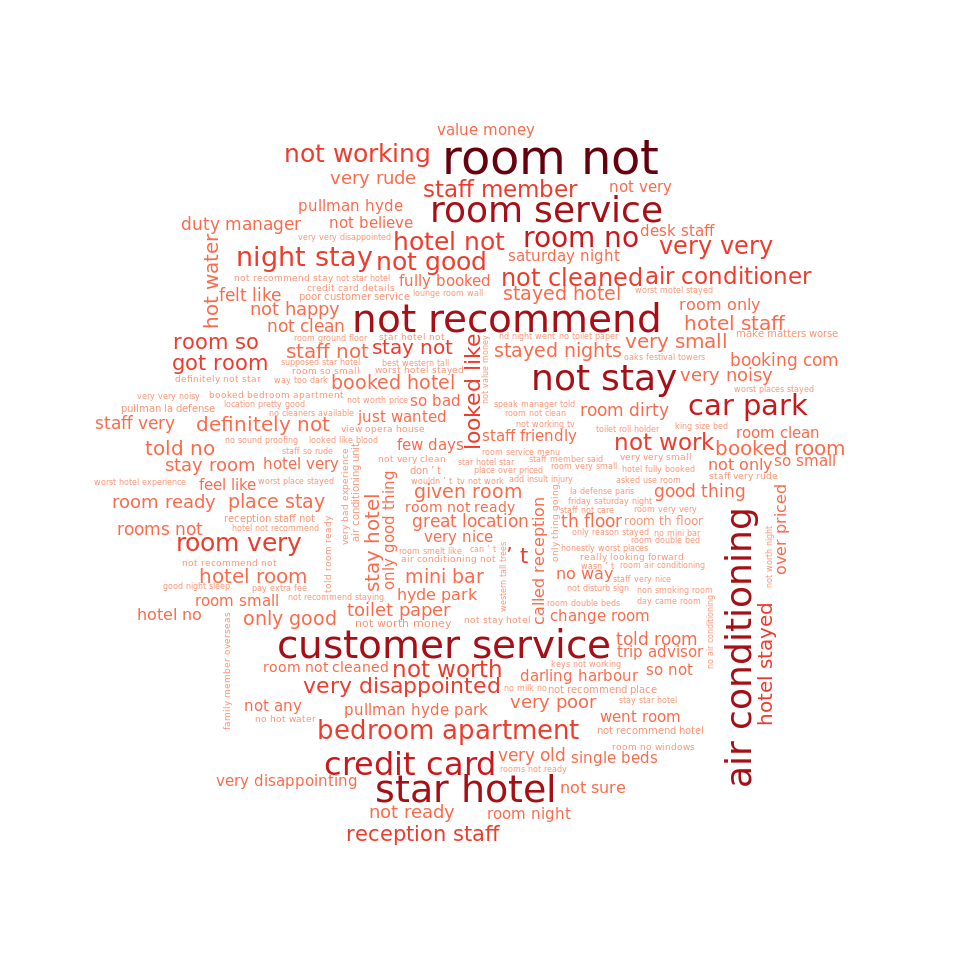

In [14]:
from IPython.core.display import Image
print("Wordcloud for rating = 1")
Image(filename=os.path.join(DatDir, '1_ratWordcloud.png'))

Wordcloud for rating = 2


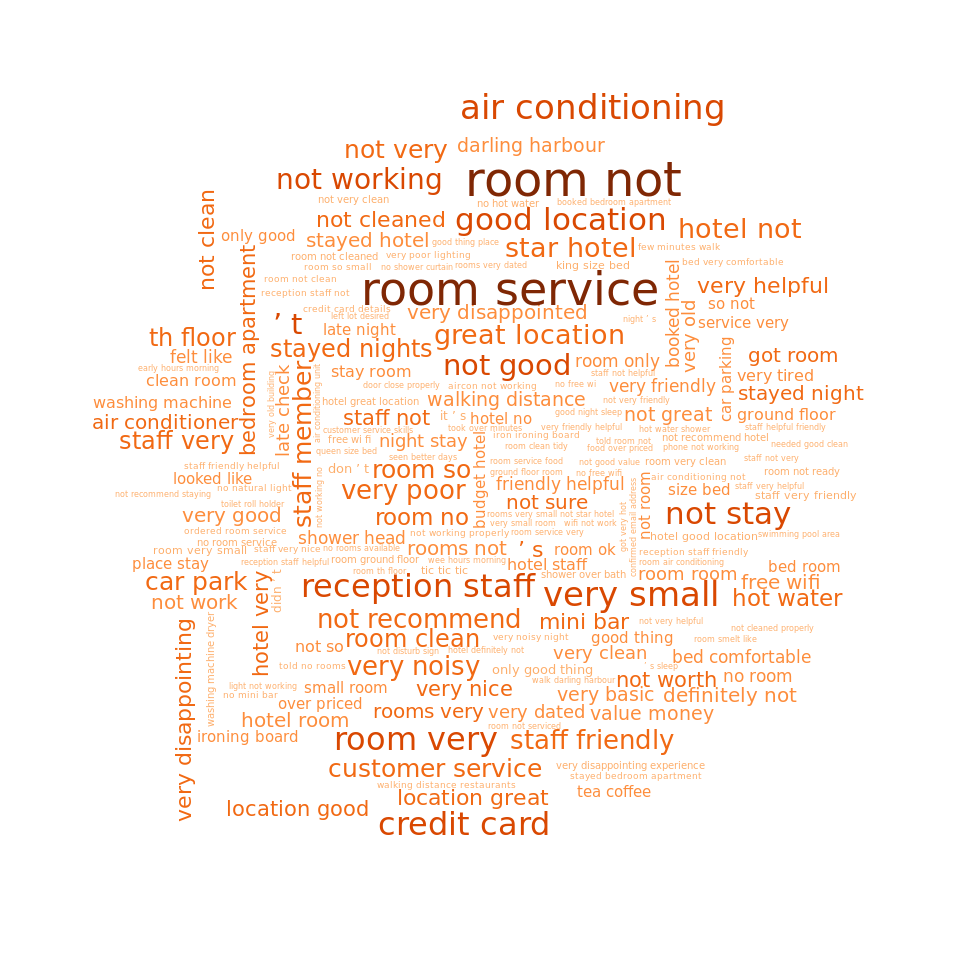

In [15]:
print("Wordcloud for rating = 2")
Image(filename=os.path.join(DatDir, '2_ratWordcloud.png'))

Wordcloud for rating = 3


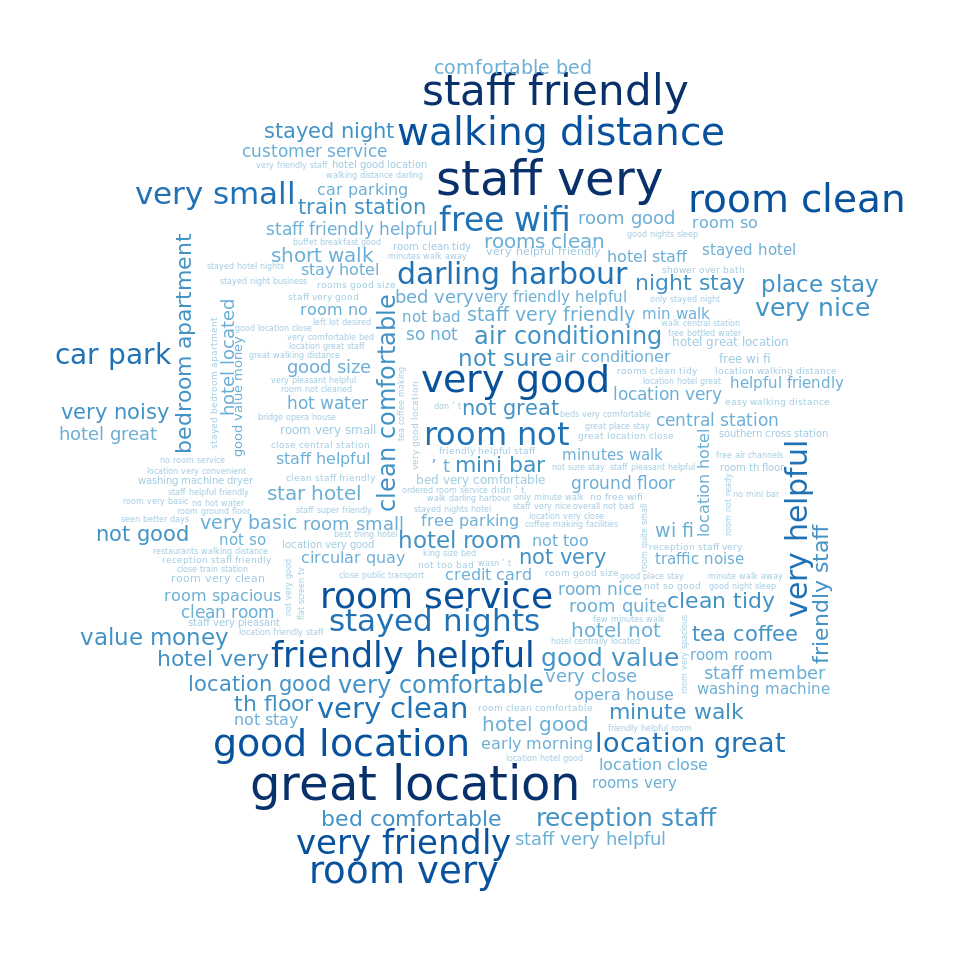

In [16]:
print("Wordcloud for rating = 3")
Image(filename=os.path.join(DatDir, '3_ratWordcloud.png'))

Wordcloud for rating = 4


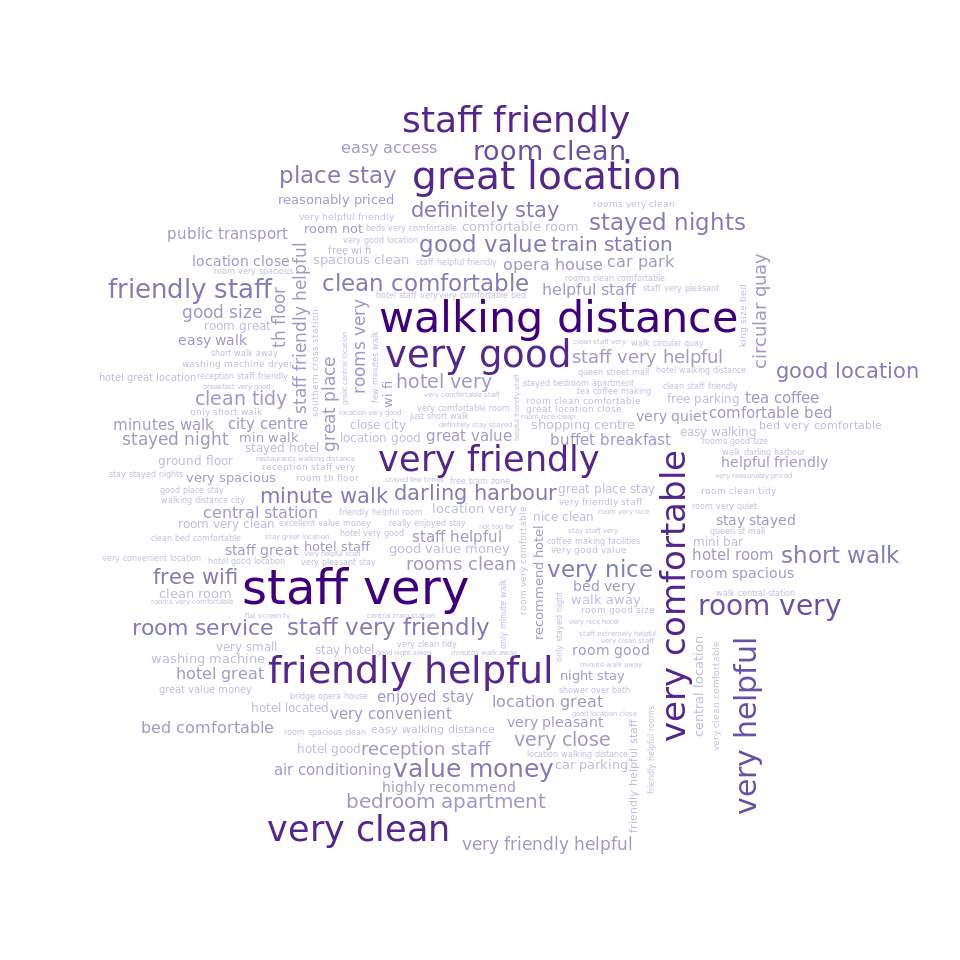

In [17]:
print("Wordcloud for rating = 4")
Image(filename=os.path.join(DatDir, '4_ratWordcloud.png'))

Wordcloud for rating = 5


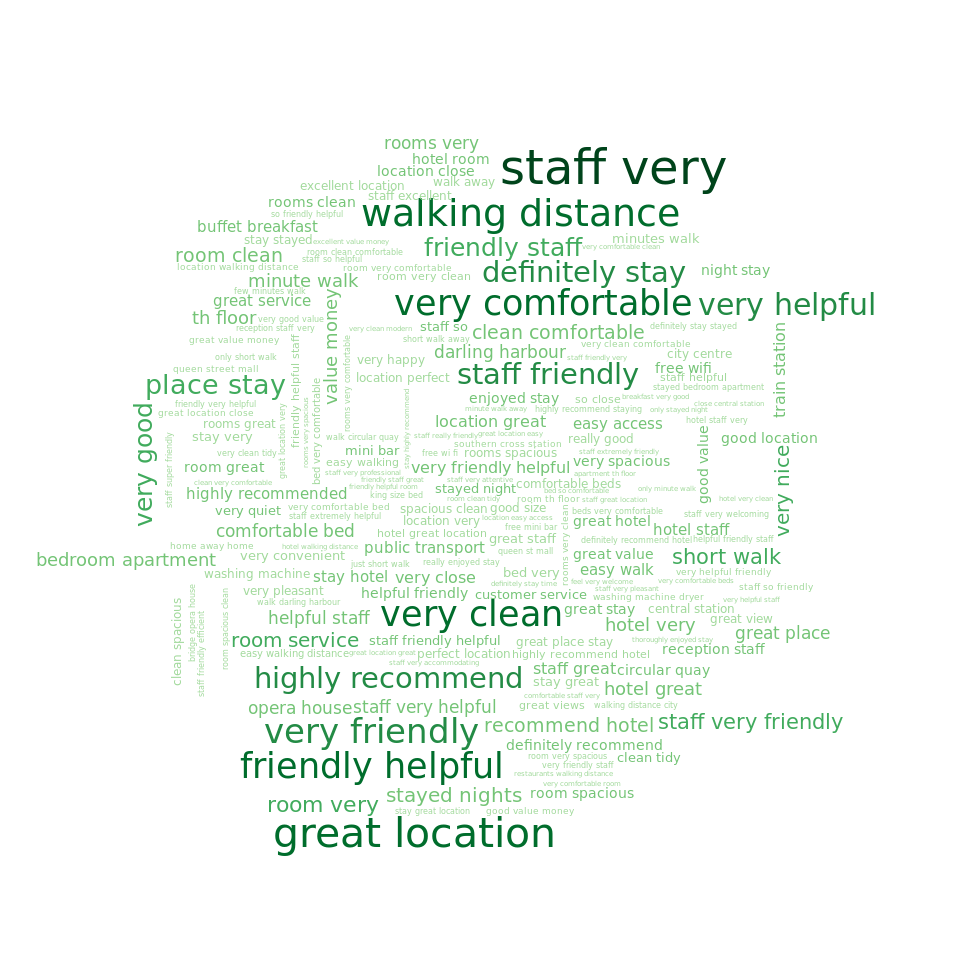

In [18]:
print("Wordcloud for rating = 5")
Image(filename=os.path.join(DatDir, '5_ratWordcloud.png'))

### A few common phrases that stand out are "customer service", "room service", "not recommend", "highly recommend", "staff  friendly", "great loaction", "walking distance"